# Librairie ndimage
scipy.ndimage est un sous-module de la bibliothèque SciPy dédié au traitement d’images multidimensionnelles. Il fournit des fonctions efficaces pour appliquer des filtres, des transformations géométriques (rotation, zoom, translation), et des opérations morphologiques. Les images sont manipulées sous forme de tableaux NumPy, ce qui permet une intégration fluide avec d'autres bibliothèques scientifiques. ndimage est particulièrement utile pour le traitement d’images en niveaux de gris ou couleur, mais aussi pour des données volumétriques (3D). Grâce à son approche vectorisée, il permet un traitement rapide et flexible sans dépendre de bibliothèques externes comme OpenCV.

#### prérequis : lancer jupyter notebook depuis l'environnement myenv
* ouvrir une console anaconda
* conda activate myenv
* jupyter-notebook.exe

In [1]:
import sys
print(sys.prefix)

C:\Users\toussaij\anaconda3


### Lecture d'une image depuis le disque
Utilisation de la fonction __imread__(nom_fichier) 

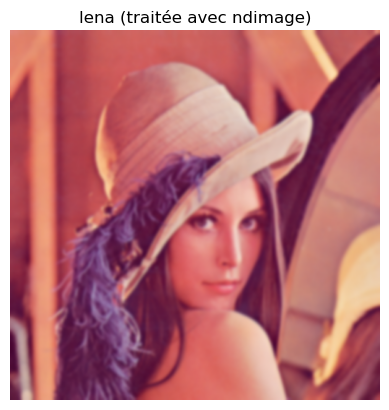

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from imageio.v2 import imread

# Chargement de l'image en couleur
img = imread("lena.png")  # img est un tableau numpy (H, W, 3)

# Traitement possible (par exemple, flou)
img_filtered = ndimage.gaussian_filter(img, sigma=(2, 2, 0))  # pas de flou sur les couleurs

# Affichage (équivalent à cv2.imshow)
plt.imshow(img_filtered)
plt.title("lena (traitée avec ndimage)")
plt.axis("off")  # pas d'axes pour ressembler à cv2.imshow
plt.show()


### Exercice :
Convertir l'image lors de la lecture en niveaux de gris, __lors de la lecture__

### Après lecture

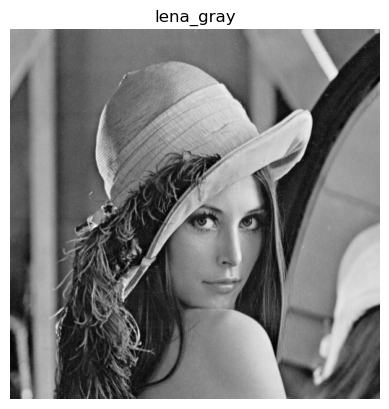

In [10]:
# Conversion en niveaux de gris (formule standard luminance)
img_gray = np.dot(img, [0.2989, 0.5870, 0.1140])  # poids perceptuels

# Affichage (équivalent à cv2.imshow)
plt.imshow(img_gray, cmap='gray')
plt.title("lena_gray")
plt.axis("off")  # suppression des axes
plt.show()

### Sauvegarde de l'image
Le format de l'image sauvegardée est donné par l'extension du fichier

In [11]:
from imageio import v2 as imageio
imageio.imwrite('./image.jpg', img)

### taille de l'image
L'image est stockée en mémoire sous la forme d'un tableau numpy

In [12]:
print(type(img))

# dimensions de l'image
dimensions = img.shape
 
# hauteur, largeur et nombre de channels = bands
height = img.shape[0]
width = img.shape[1]
channels = img.shape[2]
 
print('Image Dimension    : ',dimensions)
print('Image Height       : ',height)
print('Image Width        : ',width)
print('Number of Channels : ',channels)

<class 'numpy.ndarray'>
Image Dimension    :  (512, 512, 3)
Image Height       :  512
Image Width        :  512
Number of Channels :  3


Nouvelles dimensions : (102, 102, 3)


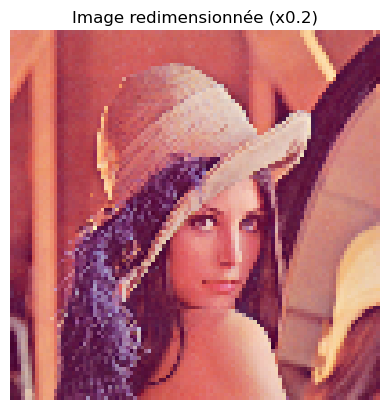

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import v2 as imageio
from scipy import ndimage

# lecture image
img = imageio.imread("lena.png")

# facteur d'échelle
factor = 0.2

# redimensionnement avec zoom de ndimage
img_redim = ndimage.zoom(img, (factor, factor, 1))  # 1 pour les canaux

# conversion explicite en entier si besoin (certaines versions donnent float64)
img_redim = np.clip(img_redim, 0, 255).astype(np.uint8)

# nouvelles dimensions
print("Nouvelles dimensions :", img_redim.shape)

# affichage
plt.imshow(img_redim)
plt.title("Image redimensionnée (x0.2)")
plt.axis("off")
plt.show()

### exercice : 
changer le rapport d'aspect

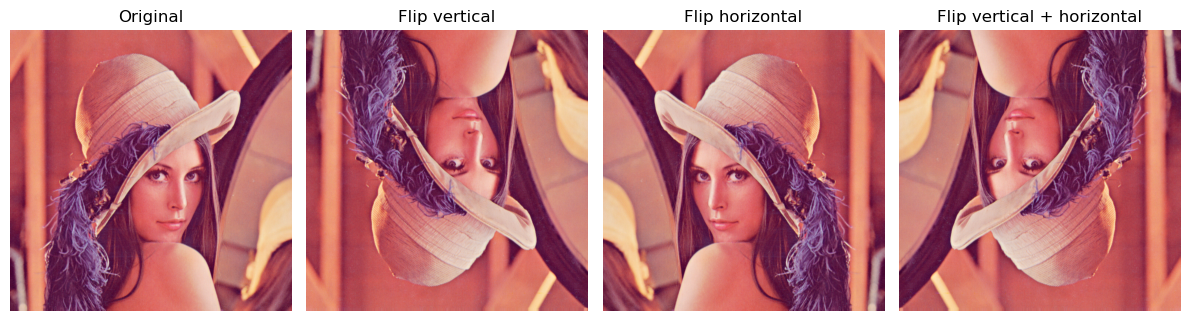

In [19]:
# flips
flip_v  = np.flipud(img)               # vertical
flip_h  = np.fliplr(img)               # horizontal
flip_hv = np.flipud(np.fliplr(img))  # vertical + horizontal

# affichage
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

axs[0].imshow(img)
axs[0].set_title("Original")
axs[1].imshow(flip_v)
axs[1].set_title("Flip vertical")
axs[2].imshow(flip_h)
axs[2].set_title("Flip horizontal")
axs[3].imshow(flip_hv)
axs[3].set_title("Flip vertical + horizontal")

for ax in axs:
    ax.axis("off")

plt.tight_layout()
plt.show()


### Rotation

Taille image: 512x512


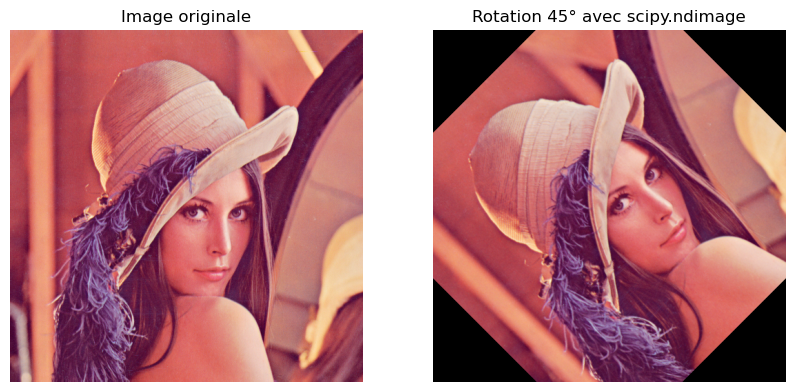

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import v2 as imageio
from scipy import ndimage

# lecture image
img = imageio.imread("lena.png")
rows, cols = img.shape[:2]
print(f"Taille image: {rows}x{cols}")

# rotation manuelle avec scipy.ndimage.rotate
# angle en degrés, rotation anti-horaire
angle = 45

# rotate garde par défaut la taille d'origine (reshape=False)
# reshape=True pour ajuster la taille (sinon image recadrée)
img_rot45 = ndimage.rotate(img, angle, reshape=False, order=1)

# affichage
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Image originale")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_rot45)
plt.title(f"Rotation {angle}° avec scipy.ndimage")
plt.axis('off')

plt.show()


### Translation

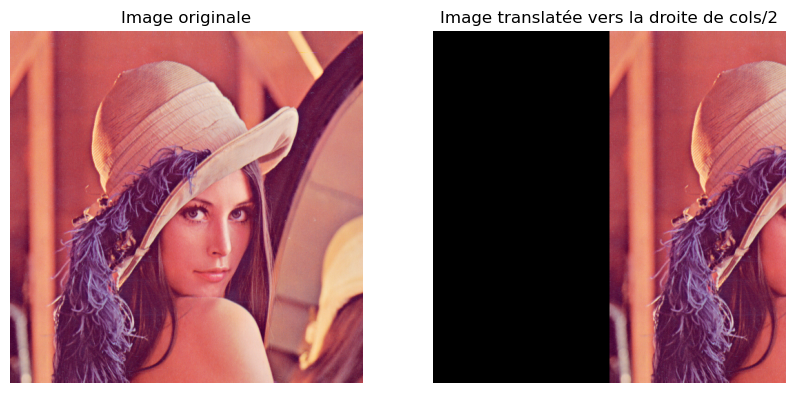

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import v2 as imageio
from scipy import ndimage

img = imageio.imread("lena.png")
rows, cols = img.shape[:2]

# translation de cols/2 pixels vers la droite
matrix = np.eye(2)  # identité
offset = [0, -cols/2]  # translation inverse dans (y, x)

if img.ndim == 3:
    img_tr = np.zeros_like(img)
    for i in range(img.shape[2]):
        img_tr[..., i] = ndimage.affine_transform(img[..., i], matrix, offset=offset, order=1, mode='constant', cval=0)
else:
    img_tr = ndimage.affine_transform(img, matrix, offset=offset, order=1, mode='constant', cval=0)

# affichage
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Image originale")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_tr)
plt.title("Image translatée vers la droite de cols/2")
plt.axis('off')
plt.show()

plt.show()


## Opérations arithmétiques sur des images avec OpenCV
Les opérations arithmétiques comme l'addition, la soustraction et les opérations par bit (AND, OR, NOT, XOR) peuvent être appliquées aux images d'entrée. 

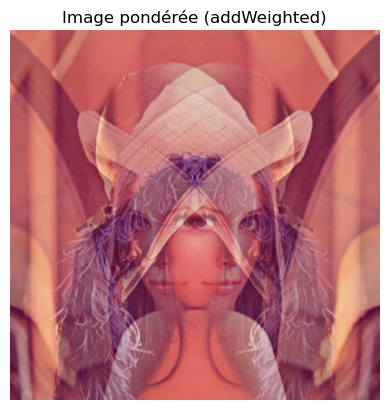

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import v2 as imageio

# lecture image
img = imageio.imread("lena.png")

# exemple simple : on crée une image retournée horizontalement (flip)
img_flip = np.flip(img, axis=1)

# poids pour mélange
alpha = 0.6
beta = 0.4
gamma = 0  # pas de décalage constant

# mélange pondéré, attention au type (convertir en float pour éviter saturation)
weightedSum = alpha * img.astype(float) + beta * img_flip.astype(float) + gamma

# clip pour rester dans la plage [0,255] puis conversion en uint8
weightedSum = np.clip(weightedSum, 0, 255).astype(np.uint8)

# affichage
plt.imshow(weightedSum)
plt.title("Image pondérée (addWeighted)")
plt.axis('off')
plt.show()


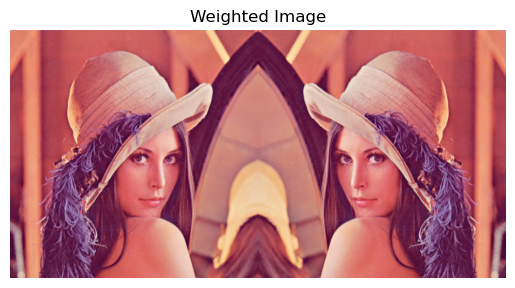

In [25]:
vis = np.concatenate((img, img_flip), axis=1)
 
# affichage
plt.imshow(vis)
plt.title('Weighted Image')
plt.axis('off')
plt.show()

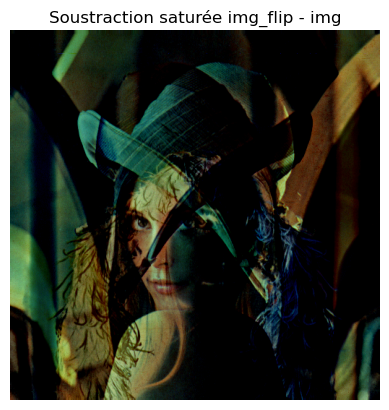

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import v2 as imageio

img = imageio.imread("lena.png")
img_flip = np.flip(img, axis=1)

# conversion en int16 pour éviter overflow négatif
sub = img_flip.astype(np.int16) - img.astype(np.int16)

# saturation min à 0, max à 255 et conversion uint8
sub = np.clip(sub, 0, 255).astype(np.uint8)

plt.imshow(sub)
plt.title("Soustraction saturée img_flip - img")
plt.axis('off')
plt.show()


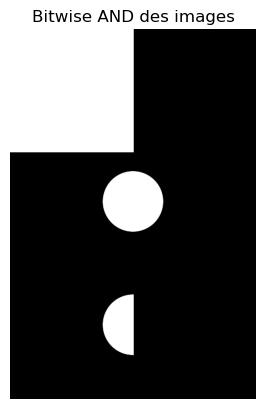

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import v2 as imageio

# lecture des images
img1 = imageio.imread('image1.png')
img2 = imageio.imread('image2.png')

# s'assurer que les images ont la même taille et même nombre de canaux
assert img1.shape == img2.shape, "Les images doivent avoir la même dimension et canaux"

# bitwise AND sur chaque pixel (attention, les images doivent être en uint8)
dest_and = np.bitwise_and(img1, img2)

# concaténation verticale pour visualiser côte à côte
vis = np.concatenate((img1, img2, dest_and), axis=0)

plt.imshow(vis)
plt.title("Bitwise AND des images")
plt.axis('off')
plt.show()

### Exercice :
faire de même avec les opérateurs bit à bit __OR__ et __XOR__

# Détection des arêtes

Le détecteur d'arêtes de Canny est un opérateur de détection d'arêtes qui utilise un algorithme à plusieurs étapes pour détecter un large éventail d'arêtes dans les images. Il a été développé par John F. Canny en 1986. Canny a également produit une théorie computationnelle de la détection des contours expliquant pourquoi la technique fonctionne. 

ndimage ne propose pas de fonction Canny prête à l’emploi. On peut utiliser la fonction feature.canny du module skimage (scikit-image), qui est une bibliothèque Python dédiée au traitement d’image, proche d’OpenCV. 

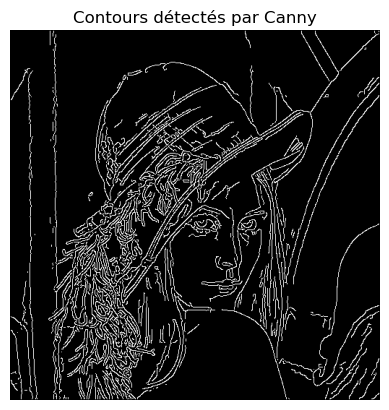

In [28]:
import matplotlib.pyplot as plt
from skimage import feature, color
from imageio import v2 as imageio

# lecture image (en couleur)
img = imageio.imread('lena.png')

# conversion en niveaux de gris (skimage Canny travaille sur image 2D)
img_gray = color.rgb2gray(img)

# détection des contours avec Canny, thresholds entre 0 et 1 (normalisé)
edges = feature.canny(img_gray, low_threshold=0.1, high_threshold=0.2)

# affichage (edges est un tableau booléen)
plt.imshow(edges, cmap='gray')
plt.title('Contours détectés par Canny')
plt.axis('off')
plt.show()

# equalization = homogénéisation de la distribution de la luminescence
Il s'agit d'une méthode qui améliore le contraste d'une image, afin d'étendre la gamme d'intensité.


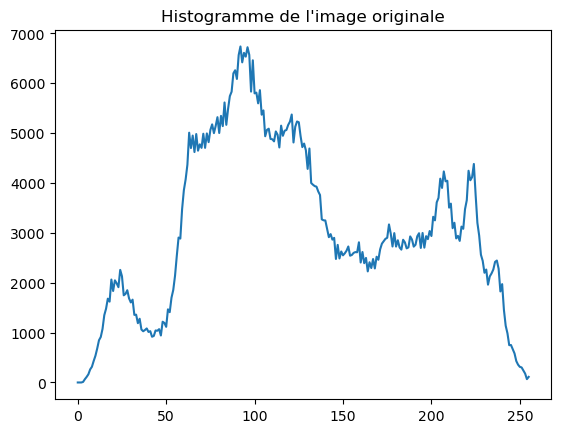

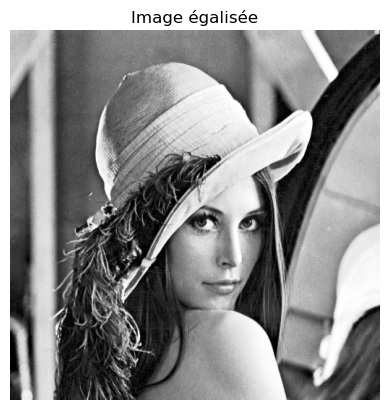

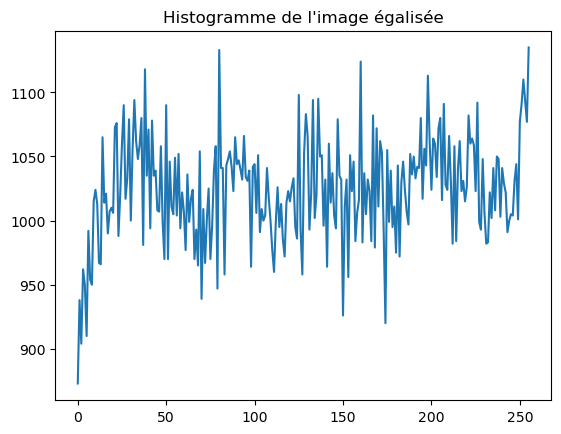

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import v2 as imageio
from skimage import color, exposure

# lecture image couleur
img = imageio.imread('lena.png')

# histogramme de l'image (tous canaux aplatis)
hist, bins = np.histogram(img.ravel(), bins=256, range=(0, 256))
plt.figure()
plt.title("Histogramme de l'image originale")
plt.plot(hist)
plt.show()

# conversion en niveaux de gris (float entre 0 et 1)
img_gray = color.rgb2gray(img)

# égalisation d'histogramme (skimage fonctionne avec float 0-1)
img_equa = exposure.equalize_hist(img_gray)

# affichage image égalisée
plt.figure()
plt.title("Image égalisée")
plt.imshow(img_equa, cmap='gray')
plt.axis('off')
plt.show()

# histogramme image égalisée (sur 256 bins entre 0 et 1)
hist_equa, bins_equa = np.histogram(img_equa.ravel(), bins=256, range=(0, 1))
plt.figure()
plt.title("Histogramme de l'image égalisée")
plt.plot(hist_equa)
plt.show()
